# Multiple linear regression models

## Data loading

In [30]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
aord = pd.read_csv('../data/indice/ALLOrdinary.csv', index_col=0) # All ordinary market indices
nikkei = pd.read_csv('../data/indice/Nikkei225.csv', index_col=0).fillna(method="ffill") # nikkei market
hsi = pd.read_csv('../data/indice/HSI.csv', index_col=0) # HSI
daxi = pd.read_csv('../data/indice/DAXI.csv', index_col=0) # dax performance index
cac40 = pd.read_csv('../data/indice/CAC40.csv', index_col=0) # cac40 index
sp500 = pd.read_csv('../data/indice/SP500.csv', index_col=0) # s&p500
dji = pd.read_csv('../data/indice/DJI.csv', index_col=0) # dji: dow jones industry average index
nasdaq = pd.read_csv('../data/indice/nasdaq_composite.csv', index_col=0) # Nasdaq
spy = pd.read_csv('../data/indice/SPY.csv', index_col=0) # spy

In [4]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,146.529999,146.990005,143.880005,144.929993,116.593864,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,116.537567,125133300
2008-01-04,143.339996,143.440002,140.910004,141.309998,113.681671,232330900
2008-01-07,141.809998,142.229996,140.100006,141.190002,113.585121,234991000
2008-01-08,142.080002,142.899994,138.440002,138.910004,111.750923,326365700


In [5]:
indicepanel = pd.DataFrame(index=spy.index)
# US markets
indicepanel['SPY'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['SPY_LAG1'] = indicepanel['SPY'].shift(1)
indicepanel['SP500'] = sp500['Open'] - sp500['Open'].shift(1)
indicepanel['NASDAQ'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['DJI'] = dji['Open'] - dji['Open'].shift(1)

# EU markets
indicepanel['CAC40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['DAXI'] = daxi['Open'] - daxi['Open'].shift(1)

# Asian markets
indicepanel['Aord'] = aord['Close'] - aord['Open']
indicepanel['HSI'] = hsi['Close'] - hsi['Open']
indicepanel['Nikkei'] = nikkei['Close'] - nikkei['Open']

indicepanel['Price'] = spy['Open']
indicepanel.head()

,SPY,SPY_LAG1,SP500,NASDAQ,DJI,CAC40,DAXI,Aord,HSI,Nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


## Data munging

In [6]:
indicepanel = indicepanel.fillna(method="ffill")
indicepanel = indicepanel.dropna()

In [7]:
indicepanel.isnull().sum()

SPY         0
SPY_LAG1    0
SP500       0
NASDAQ      0
DJI         0
CAC40       0
DAXI        0
Aord        0
HSI         0
Nikkei      0
Price       0
dtype: int64

In [42]:
indicepanel.to_csv('../data/indice/indicepanel.csv')

In [8]:
indicepanel.shape

(2677, 11)

## Data splitting

In [9]:
training = indicepanel.iloc[-2000 : -1000, : ]
testing = indicepanel.iloc[-1000 : , : ]
print(training.shape, testing.shape)

(1000, 11) (1000, 11)


## Exploration on training data

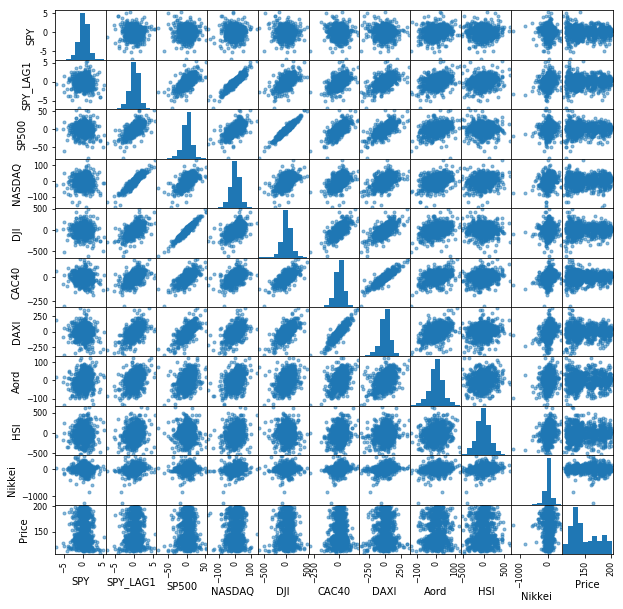

In [10]:
sm = pd.scatter_matrix(training, figsize=(10, 10))
plt.show()

In [11]:
training.iloc[ : , : -1].corr()['SPY']

SPY         1.000000
SPY_LAG1   -0.011623
SP500      -0.018632
NASDAQ      0.012333
DJI        -0.037097
CAC40      -0.055304
DAXI       -0.069735
Aord        0.179638
HSI         0.031400
Nikkei     -0.035048
Name: SPY, dtype: float64

## Regression model

In [12]:
import statsmodels.formula.api as smf
formula = 'SPY~SPY_LAG1+SP500+NASDAQ+DJI+CAC40+DAXI+Aord+HSI+Nikkei'
lm = smf.ols(formula=formula, data=training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.962
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.97e-11
Time:                        14:49:25   Log-Likelihood:                -1617.7
No. Observations:                1000   AIC:                             3255.
Df Residuals:                     990   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0836      0.039      2.138      0.033       0.007       0.160
SPY_LAG1      -0.1567      0.091     -1.730      0.084      -0.335       0.021
SP500          0.0221      0.014      1.621      0.105      -0.005       0.049
NASDAQ         0.0040      0.004      1.066      0.287      -0.003       0.011
DJI           -0.0018      0.001     -1.248      0.212      -0.005       0.001
CAC40         -0.0003      0.002     -0.153      0.879      -0.004       0.004
DAXI          -0.0025      0.001     -2.387      0.017      -0.005      -0.000
Aord           0.0093      0.001      7.492      0.000       0.007       0.012
HSI            0.0003      0.000      1.222      0.222      -0.000       0.001
Nikkei        -0.0004      0.000     -1.264      0.207      -0.001       0.000
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.687
Skew:                          -0.450   Prob(JB):                     7.45e-59
Kurtosis:                       5.369   Cond. No.                         405.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinarity

In [13]:
training.iloc[ : , : -1].corr()

,SPY,SPY_LAG1,SP500,NASDAQ,DJI,CAC40,DAXI,Aord,HSI,Nikkei
SPY,1.000000,-0.011623,-0.018632,0.012333,-0.037097,-0.055304,-0.069735,0.179638,0.031400,-0.035048
SPY_LAG1,-0.011623,1.000000,0.664272,0.932118,0.575321,0.522888,0.565114,0.395671,0.202504,0.213631
SP500,-0.018632,0.664272,1.000000,0.636528,0.960032,0.693578,0.689415,0.333324,-0.017733,0.086266
NASDAQ,0.012333,0.932118,0.636528,1.000000,0.517313,0.476918,0.524729,0.377861,0.200029,0.196615
DJI,-0.037097,0.575321,0.960032,0.517313,1.000000,0.689268,0.683860,0.311168,-0.060799,0.060754
CAC40,-0.055304,0.522888,0.693578,0.476918,0.689268,1.000000,0.898456,0.410262,0.182876,0.239216
DAXI,-0.069735,0.565114,0.689415,0.524729,0.683860,0.898456,1.000000,0.429645,0.179705,0.254439
Aord,0.179638,0.395671,0.333324,0.377861,0.311168,0.410262,0.429645,1.000000,0.152688,0.187826
HSI,0.031400,0.202504,-0.017733,0.200029,-0.060799,0.182876,0.179705,0.152688,1.000000,0.232350
Nikkei,-0.035048,0.213631,0.086266,0.196615,0.060754,0.239216,0.254439,0.187826,0.232350,1.000000


## Making prediction

In [32]:
training['PredictedY'] = lm.predict(training)
testing['PredictedY'] = lm.predict(testing)

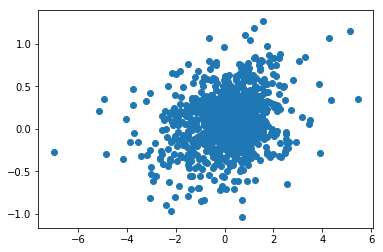

In [33]:
plt.scatter(training['SPY'], training['PredictedY'])

In [37]:
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean()) ** 2).sum()
    SSR = ((data['yhat'] - data['yhat'].mean()) ** 2).sum()
    SSE = ((data[yname] - data['yhat']) ** 2).sum()
    R2 = SSR / SST
    adjustR2 = 1 - (1 - R2) * (data.shape[0] - 1) / (data.shape[0] - model_k - 1)
    RMSE = (SSE / (data.shape[0] - model_k -1)) ** 0.5
    
    return adjustR2, RMSE

In [38]:
print(f"Adjusted R2 and RMSE for training = {adjustedMetric(training, lm, 9, 'SPY')}")
print(f"Adjusted R2 and RMSE for testing = {adjustedMetric(testing, lm, 9, 'SPY')}")

Adjusted R2 and RMSE for training = (0.05901994708387226, 1.22606832887647)
Adjusted R2 and RMSE for testing = (0.067247605342813377, 1.7012905081841028)


In [39]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['training', 'testing'])
    assessment['training'] = [r2train, RMSEtrain]
    assessment['testing'] = [r2test, RMSEtest]
    
    return assessment

In [41]:
assessTable(testing, training, lm, 9, 'SPY')

,training,testing
R2,0.059020,0.067248
RMSE,1.226068,1.701291
